In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

In [43]:
#importing the dataset
data = pd.read_csv('drinkMenu.csv')


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [45]:
data.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [46]:
#printing first 5 rows in dataset
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [47]:
#checking unique values for each column to remove invalid entries
for i in data.columns:
    
    print(i)
    print(data[i].unique())

Beverage_category
['Coffee' 'Classic Espresso Drinks' 'Signature Espresso Drinks'
 'Tazo® Tea Drinks' 'Shaken Iced Beverages' 'Smoothies'
 'Frappuccino® Blended Coffee' 'Frappuccino® Light Blended Coffee'
 'Frappuccino® Blended Crème']
Beverage
['Brewed Coffee' 'Caffè Latte' 'Caffè Mocha (Without Whipped Cream)'
 'Vanilla Latte (Or Other Flavoured Latte)' 'Caffè Americano' 'Cappuccino'
 'Espresso' 'Skinny Latte (Any Flavour)' 'Caramel Macchiato'
 'White Chocolate Mocha (Without Whipped Cream)'
 'Hot Chocolate (Without Whipped Cream)'
 'Caramel Apple Spice (Without Whipped Cream)' 'Tazo® Tea'
 'Tazo® Chai Tea Latte' 'Tazo® Green Tea Latte'
 'Tazo® Full-Leaf Tea Latte'
 'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)'
 'Iced Brewed Coffee (With Classic Syrup)'
 'Iced Brewed Coffee (With Milk & Classic Syrup)'
 'Shaken Iced Tazo® Tea (With Classic Syrup)'
 'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)'
 'Banana Chocolate Smoothie' 'Orange Mango Banana Smoothie'
 'Strawberry Banana

In [48]:
print(data.dtypes)
# reformating types of columns
numerical_cols = ['Calories',   ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)']

percentages = ['Vitamin A (% DV) ','Vitamin C (% DV)',	' Calcium (% DV) ',	'Iron (% DV) ']

for i in percentages:
    data[i] = data[i].str.rstrip("%").astype(float)

for i in numerical_cols:

    data[i] = pd.to_numeric(data[i],errors='coerce')
    print(i, data[i].unique())


Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object
Calories [  3   4   5  70 100 150 110 130 190 170 240 200 180 220 260 230 280 340
 290 160 250 210 320 270  10  15  25  50  80  60  90 120 140 300 310 350
 400 370 450 510 460 380 330 360   0 390 420 430]
 Total Fat (g) [ 0.1  3.5  2.5  0.2  6.   4.5  0.3  7.   5.   0.4  9.   1.5  4.   2.
  8.   3.  11.   0.   1.  10. 

In [49]:
# length before dropping duplicates
print(len(data))

# dropping duplicate beverages based on the following columns 
categorical_cols = ['Beverage_category', 'Beverage', 'Beverage_prep']
data = data.drop_duplicates(subset=categorical_cols, keep='first', inplace=False, ignore_index=False)

# length after removing duplicates
len(data)


242


152

In [50]:
all_cols = data.columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = data.select_dtypes(include=numerics)
num_cols = newdf.columns
categorical_cols = [item for item in all_cols if item not in num_cols]
all_cols

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

c:\Users\passant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


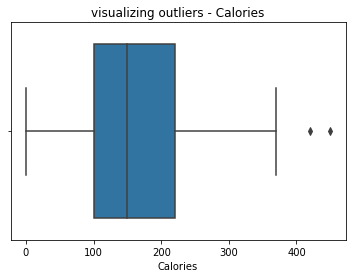

c:\Users\passant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


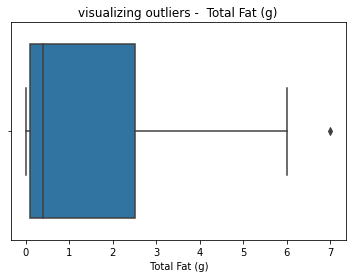

c:\Users\passant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


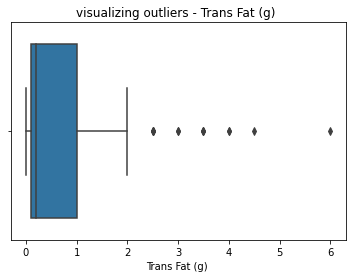

c:\Users\passant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


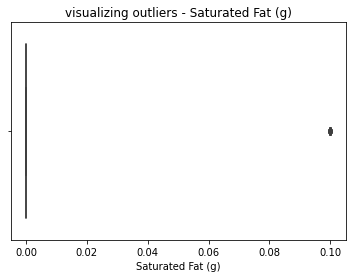

c:\Users\passant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


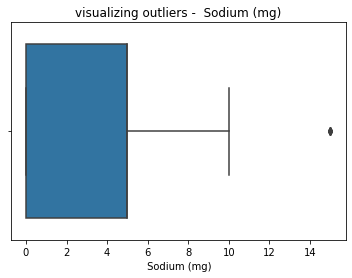

c:\Users\passant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


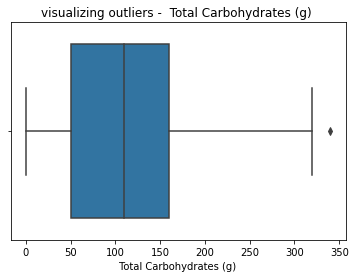

c:\Users\passant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


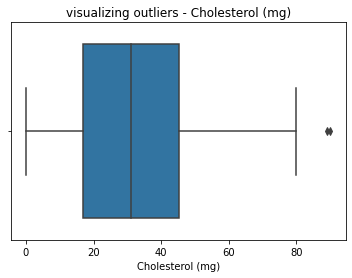

c:\Users\passant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


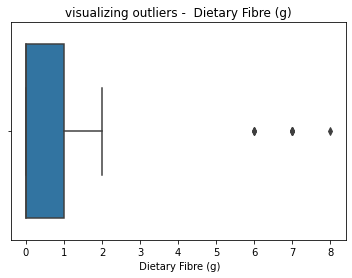

c:\Users\passant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


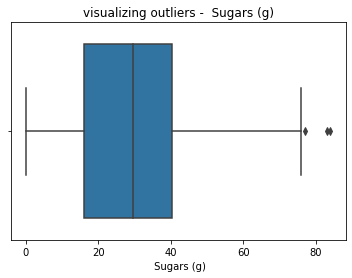

c:\Users\passant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


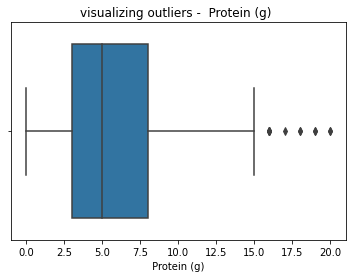

c:\Users\passant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


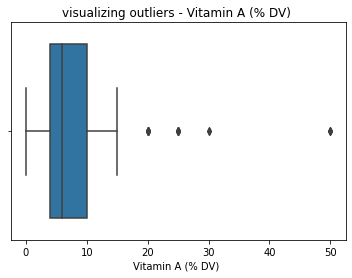

c:\Users\passant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


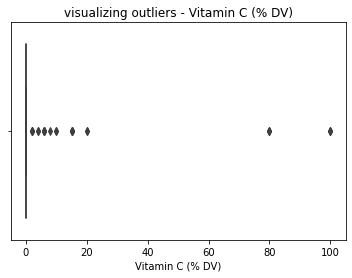

c:\Users\passant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


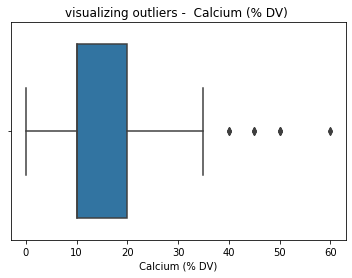

c:\Users\passant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


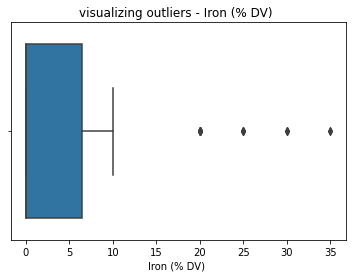

c:\Users\passant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


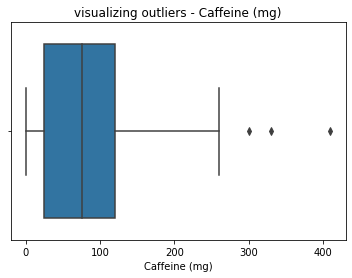

In [51]:
import seaborn as sns
import matplotlib.pylab as plt   
for j in numerical_cols:
    
    #visualization

    sns.boxplot(data[j]).set_title('visualizing outliers - ' + j)
    plt.show()

In [52]:

for i in data.columns:

    check_for_nan = data[i].isna().values.any()
    print (i,check_for_nan)

    
print('Will fill na values in the ''Caffeine (mg)'' column')

Beverage_category False
Beverage False
Beverage_prep False
Calories False
 Total Fat (g) False
Trans Fat (g)  False
Saturated Fat (g) False
 Sodium (mg) False
 Total Carbohydrates (g)  False
Cholesterol (mg) False
 Dietary Fibre (g) False
 Sugars (g) False
 Protein (g)  False
Vitamin A (% DV)  False
Vitamin C (% DV) False
 Calcium (% DV)  False
Iron (% DV)  False
Caffeine (mg) True
Will fill na values in the Caffeine (mg) column


In [53]:
# # function to convert categorical columns to numerical 
# def convert_categorical(data):
#     obj_df = data.select_dtypes(include=['object']).copy()
#     obj_cols = obj_df.columns
#     maps = {}
#     for i in obj_cols:
#         obj_df[i] = obj_df[i].astype('category')
#         maps[str(i)] = (dict(enumerate(obj_df[i].cat.categories)))
#         obj_df[i] = obj_df[i].cat.codes
#         data[i] = obj_df[i]
#     return data

In [54]:
# calculating mean of numerical columns
mean = data[numerical_cols].mean()
mean

Calories                     161.296053
 Total Fat (g)                 1.337500
Trans Fat (g)                  0.717105
Saturated Fat (g)              0.011842
 Sodium (mg)                   3.881579
 Total Carbohydrates (g)     111.776316
Cholesterol (mg)              32.309211
 Dietary Fibre (g)             0.723684
 Sugars (g)                   29.546053
 Protein (g)                   6.057895
Vitamin A (% DV)               8.953947
Vitamin C (% DV)               4.796053
 Calcium (% DV)               16.098684
Iron (% DV)                    5.013158
Caffeine (mg)                 83.222222
dtype: float64

In [55]:
# filling na values with mean value for  'Caffeine (mg)'
for i in num_cols:
     data[i] = data[i].fillna(mean[i])    

In [61]:
# prepare data for visualization and dropping irrelevant columns

data = data[['Beverage','Calories',' Sugars (g)']]

calories_data = data.sort_values(by=['Calories'], ascending=False)
calories_data = calories_data[0:20]

sugar_data = data.sort_values(by=[' Sugars (g)'], ascending=False)
sugar_data = sugar_data[0:20]


In [83]:
# plotting function
def plotting( x, y, xlabel, ylabel, rotation, data,title):
    sns.barplot(x, y, data=data, color='blue')
    plt.title(title, fontsize=40)
    plt.xlabel(xlabel, fontsize=10)
    plt.xticks(fontsize=45, rotation=rotation)
    plt.ylabel(ylabel, fontsize=10)
    return None

c:\Users\passant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


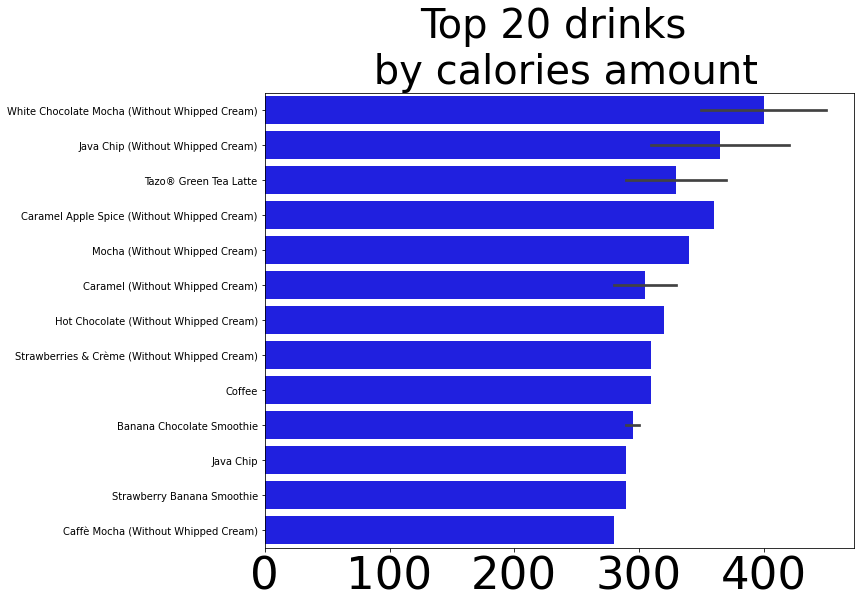

In [84]:
# plotting first question by only plotting calories of top 20 drinks and the highest one is White Chocolate Mocha (without whipped cream)
fig, ax = plt.subplots(figsize=(10,8))
fig.tight_layout(pad=5)

plotting( x='Calories', y='Beverage',
                 xlabel='', ylabel=None,
                 rotation=None, data = calories_data,title = 'Top 20 drinks \n by calories amount')
plt.show()                     

c:\Users\passant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


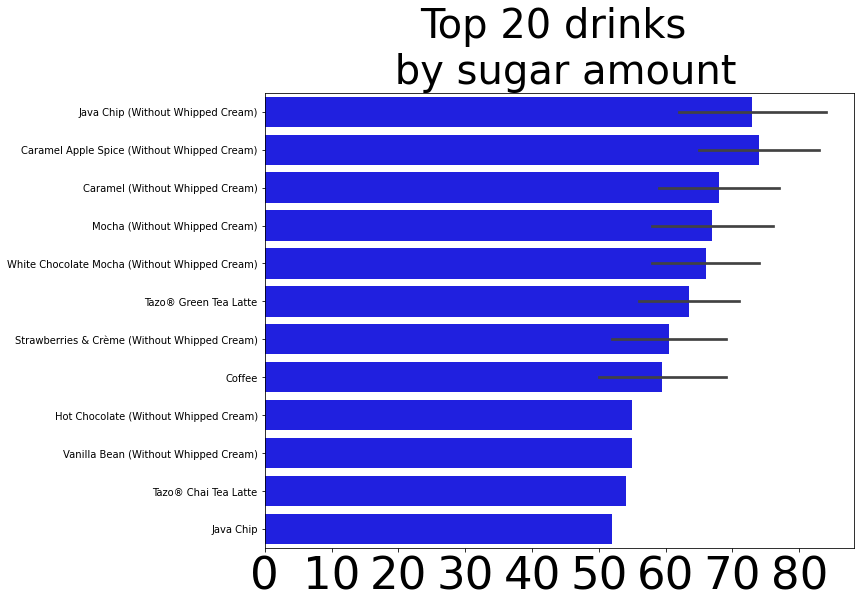

In [85]:
# plotting second question by only plotting sugar amounts of top 20 drinks and the highest one is Java Chip (without whipped cream)
fig, ax = plt.subplots(figsize=(10,8))
fig.tight_layout(pad=5)

plotting(x=' Sugars (g)', y='Beverage',
                 xlabel='', ylabel=None,
                 rotation=None, data=sugar_data,title ='Top 20 drinks \n by sugar amount')
plt.show()   